Что нужно сделать

Визуализация данных — полезный инструмент не только для аналитика, но и для заказчика. Поэтому в этом задании вы построите визуализации, которые помогут сформулировать дальнейшие гипотезы, а также продемонстрировать заказчику результаты вашего анализа.

Воспользуйтесь таблицей с фродовыми данными, которую вы сохранили в одном из предыдущих модулей. Постройте гистограмму распределения количества этапов воронки, которые были скомпрометированы. Попробуйте объяснить, руководствуясь здравым смыслом, почему именно эти этапы оказались легко атакованы.
Постройте воронки продаж по всем каналам коммуникации с клиентом. Сделайте предварительные выводы, какой канал коммуникации кажется вам менее перспективным.
Постройте графики затрат для каждого рекламного канала и прибыли по ним на последнем этапе воронки. Подумайте, как удачнее расположить получившиеся графики.
Постройте график распределения операционной системы пользователя для каждого канала коммуникации. Какие выводы можно сделать?

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('df_fraud.xlsx', index_col=0)

In [8]:
data.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
114,389186,interest,150050,NaN,Android,banner,0.5
115,389186,interest,150050,NaN,iOS,banner,0.5
284,401967,interest,150139,NaN,iOS,banner,0.5
285,401967,interest,150139,NaN,Android,banner,0.5
293,506048,interest,150145,NaN,iOS,banner,0.5


In [4]:
data['funnel_stage'] = data['funnel_stage'].str.lower()

In [5]:
data['profit'] = data.profit.fillna(0)

In [6]:
data_funnel_stage_count = data   \
                .groupby('funnel_stage', as_index=False) \
                .agg(user_count=('user_id', 'count'))

In [7]:
data_funnel_stage_count

,funnel_stage,user_count
0,intent,448
1,interest,7034


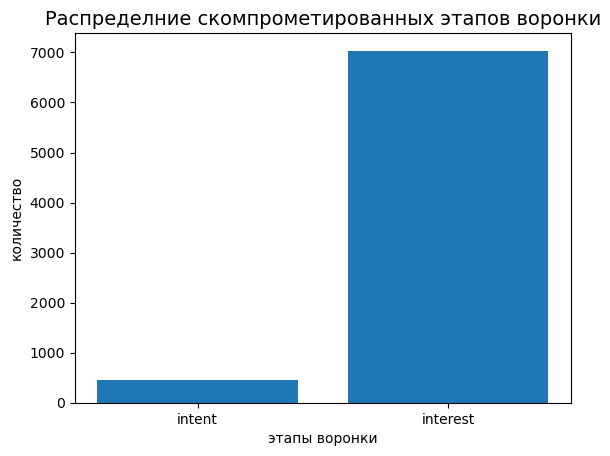

In [8]:

# Рисуем гистограмму
plt.bar(data_funnel_stage_count['funnel_stage'], data_funnel_stage_count['user_count'])
# Заголовок
plt.title('Распределние скомпрометированных этапов воронки', fontsize=14)
# Название оси X
plt.xlabel('этапы воронки')
# Название оси Y
plt.ylabel('количество')
plt.show()

In [109]:
data = pd.read_excel('result_df.xlsx', index_col=0)

In [110]:
data['profit'] = data.profit.fillna(0)

In [111]:
data['funnel_stage'] = data['funnel_stage'].str.lower()

In [12]:
grouped_data = data.groupby(['ad_channel', 'funnel_stage']).size().unstack()
grouped_data

funnel_stage,consideration,intent,interest,purchase
ad_channel,,,,
banner,47454,7711,92948,690
native,12585,416,19553,36
organic_traffic,53618,9249,79456,540
other,1822,233,3244,44
partner_network,24737,4459,66844,453
rich,4658,1254,9009,21
video,60876,58,98916,5


In [13]:
grouped = data.groupby('ad_channel')
grouped

In [74]:
data

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
2025238,833649,interest,150000,0.0,Android,video,0.75
2025237,512217,interest,150000,0.0,iOS,video,0.75
2025239,327813,interest,150002,0.0,Android,video,0.75
2025242,540307,interest,150004,0.0,Android,video,0.75
2025240,241345,interest,150004,0.0,iOS,video,0.75
...,...,...,...,...,...,...,...
2737571,446310,consideration,200926,0.0,Android,video,0.75
2737572,340340,consideration,200927,0.0,Android,video,0.75
2737573,313410,consideration,200951,0.0,iOS,video,0.75
2737574,32380,consideration,200953,0.0,Android,video,0.75


In [133]:
grouped_data = data.groupby(['ad_channel', 'funnel_stage']).size().unstack()

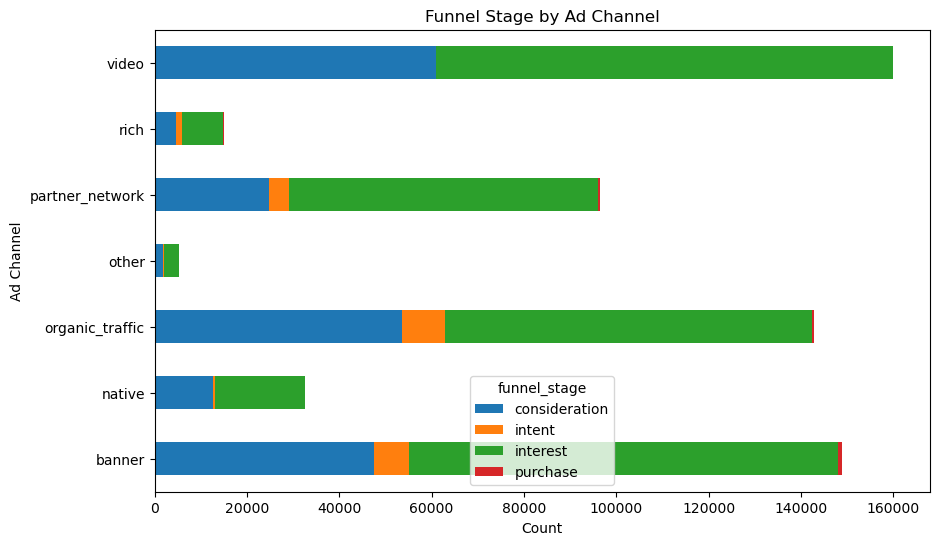

In [140]:
grouped_data = data.groupby(['ad_channel', 'funnel_stage']).size().unstack()

# Построение горизонтальной диаграммы
grouped_data.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Funnel Stage by Ad Channel')
plt.xlabel('Count')
plt.ylabel('Ad Channel')
plt.show()


In [44]:
grouped_data = data.groupby(['funnel_stage', 'ad_channel']).size().unstack()

In [45]:
grouped_data

ad_channel,banner,native,organic_traffic,other,partner_network,rich,video
funnel_stage,,,,,,,
consideration,47454,12585,53618,1822,24737,4658,60876
intent,7711,416,9249,233,4459,1254,58
interest,92948,19553,79456,3244,66844,9009,98916
purchase,690,36,540,44,453,21,5


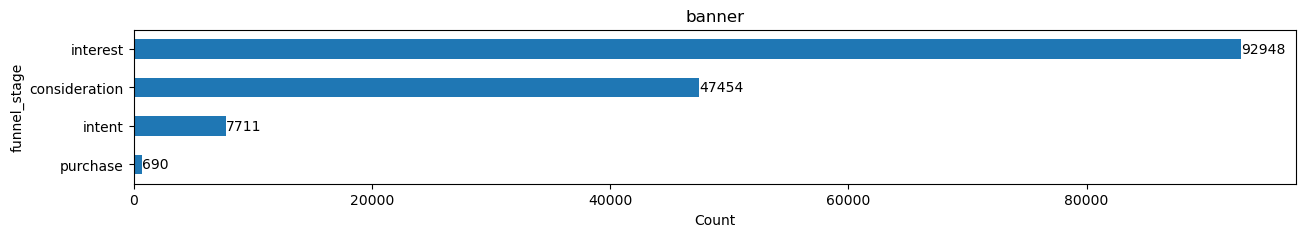

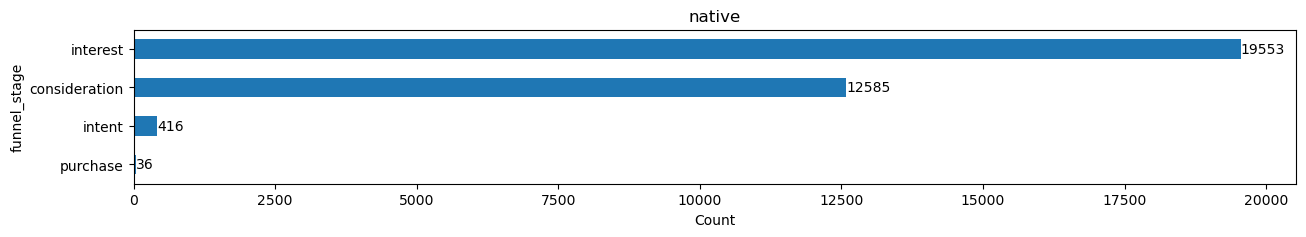

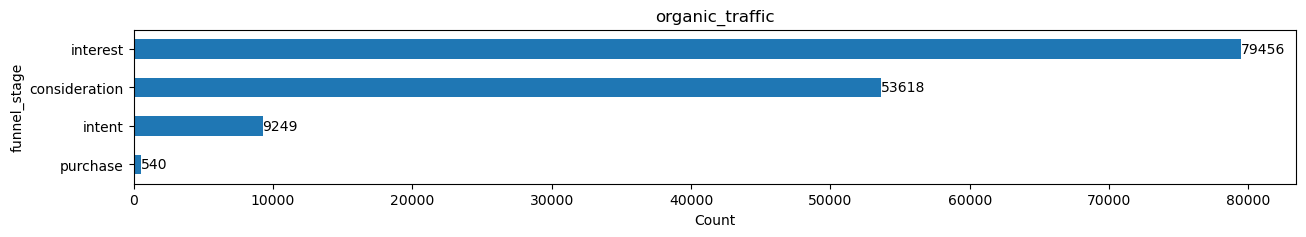

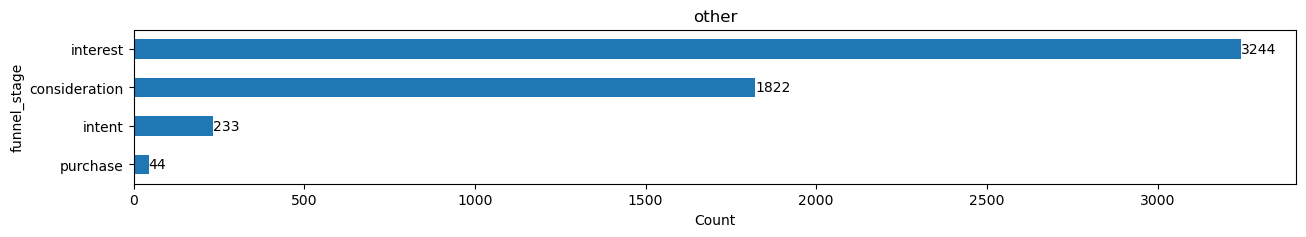

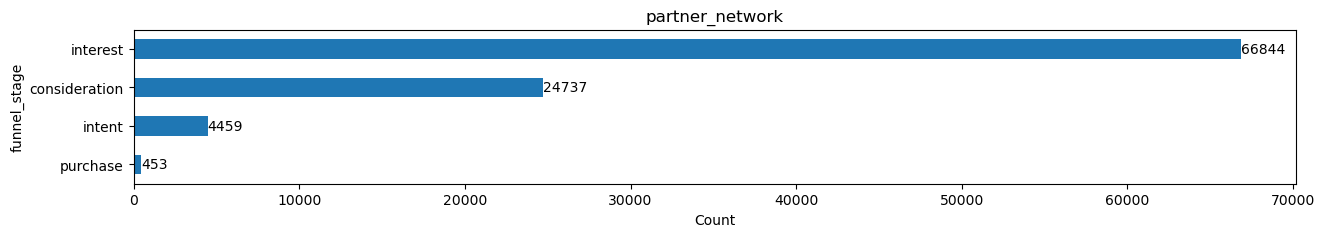

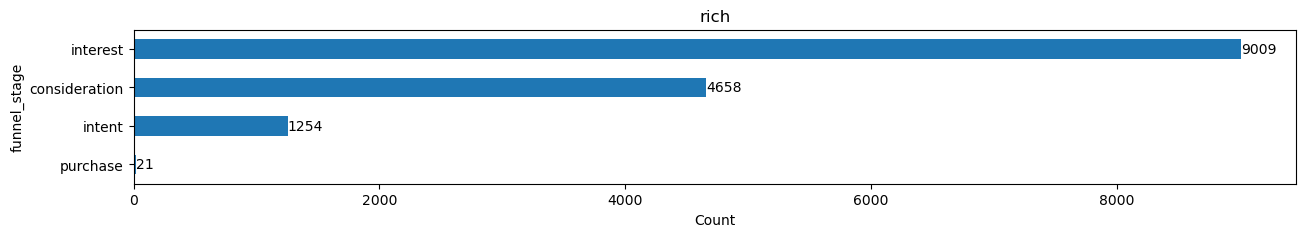

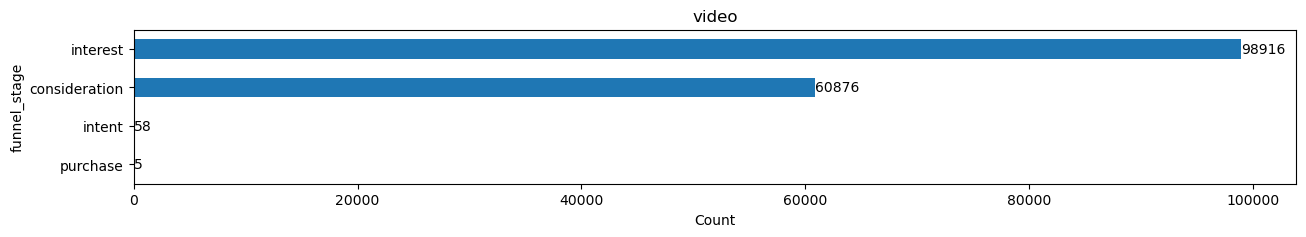

In [50]:
for i in grouped_data.columns:
    ax = grouped_data[i].sort_values().plot(kind='barh', stacked=True, figsize=(15, 2))
    
    plt.title(i)
    plt.xlabel('Count')
    plt.ylabel('funnel_stage')
    for rect in ax.patches:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2, f'{width:.0f}', ha='left', va='center')
    plt.show()

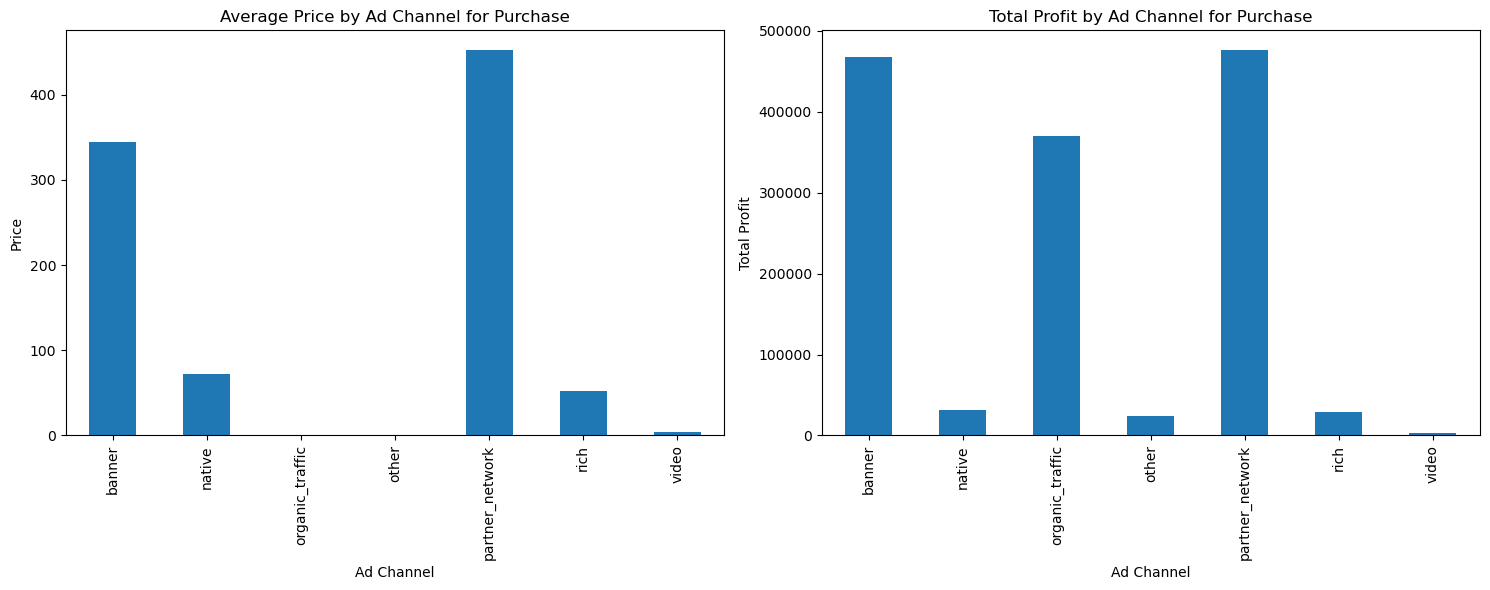

In [112]:
purchase_data = data[data['funnel_stage'] == 'purchase']
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# График для price
axs[0].set_title('Average Price by Ad Channel for Purchase')
purchase_data.groupby('ad_channel')['price'].sum().plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Ad Channel')
axs[0].set_ylabel('Price')

# График для profit
axs[1].set_title('Total Profit by Ad Channel for Purchase')
purchase_data.groupby('ad_channel')['profit'].sum().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Ad Channel')
axs[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()



In [65]:
purchase_data.groupby('ad_channel')['price'].sum()

ad_channel
banner             345.00
native              72.00
organic_traffic      0.00
other                0.00
partner_network    453.00
rich                52.50
video                3.75
Name: price, dtype: float64

In [62]:
purchase_data

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
1564675,893059,purchase,150107,260.0,Android,partner_network,1.0
3295,110508,purchase,150298,130.0,Android,banner,0.5
4765,1044882,purchase,150447,130.0,Android,banner,0.5
1569812,717163,purchase,150609,1099.0,iOS,partner_network,1.0
1569989,1060638,purchase,150712,1099.0,iOS,partner_network,1.0
...,...,...,...,...,...,...,...
2025236,789473,purchase,201912,2136.0,Android,partner_network,1.0
1542030,1036500,purchase,202012,50.0,Android,organic_traffic,0.0
1542031,539693,purchase,202053,50.0,iOS,organic_traffic,0.0
1542032,583326,purchase,202140,1099.0,Android,organic_traffic,0.0


In [82]:
purchase_data.groupby('ad_channel')['price'].sum()

ad_channel
banner             345.00
native              72.00
organic_traffic      0.00
other                0.00
partner_network    453.00
rich                52.50
video                3.75
Name: price, dtype: float64

In [81]:
purchase_data.groupby('ad_channel')['profit'].sum()

ad_channel
banner             467173.0
native              31665.0
organic_traffic    370283.0
other               24596.0
partner_network    476881.0
rich                29301.0
video                3595.0
Name: profit, dtype: float64

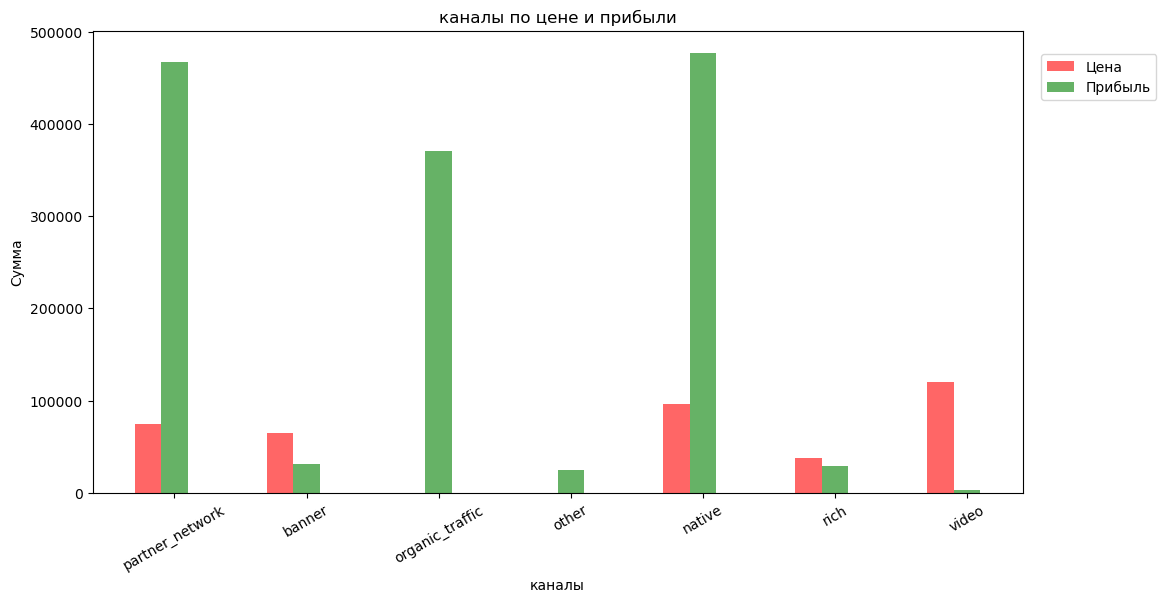

In [142]:
# Данные в переменные
utms = purchase_data.ad_channel.unique()
price = data.groupby('ad_channel')['price'].sum()
profit  = purchase_data.groupby('ad_channel')['profit'].sum()

# Настройка параметров графика
bar_width = 0.2
index = np.arange(len(utms))

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))

# Нарисовать столбцы
ax.bar(index, price, bar_width,
                color='red', alpha=0.6,
                label='Цена')
ax.bar(index + bar_width, profit, bar_width,
                color='green', alpha=0.6,
                label='Прибыль')


# Настройка осей и заголовка
ax.set_xlabel('каналы')
ax.set_ylabel('Сумма')
ax.set_title('каналы по цене и прибыли')
# Указываем место для подписей
ax.set_xticks(index + bar_width)
# Указываем название подписей
ax.set_xticklabels(utms)
# Поворачиваем подпись на осях
ax.tick_params(axis='x', labelrotation=30)
# Легенда
ax.legend(loc=(1.02, 0.85))
# Отображение графика
plt.show()

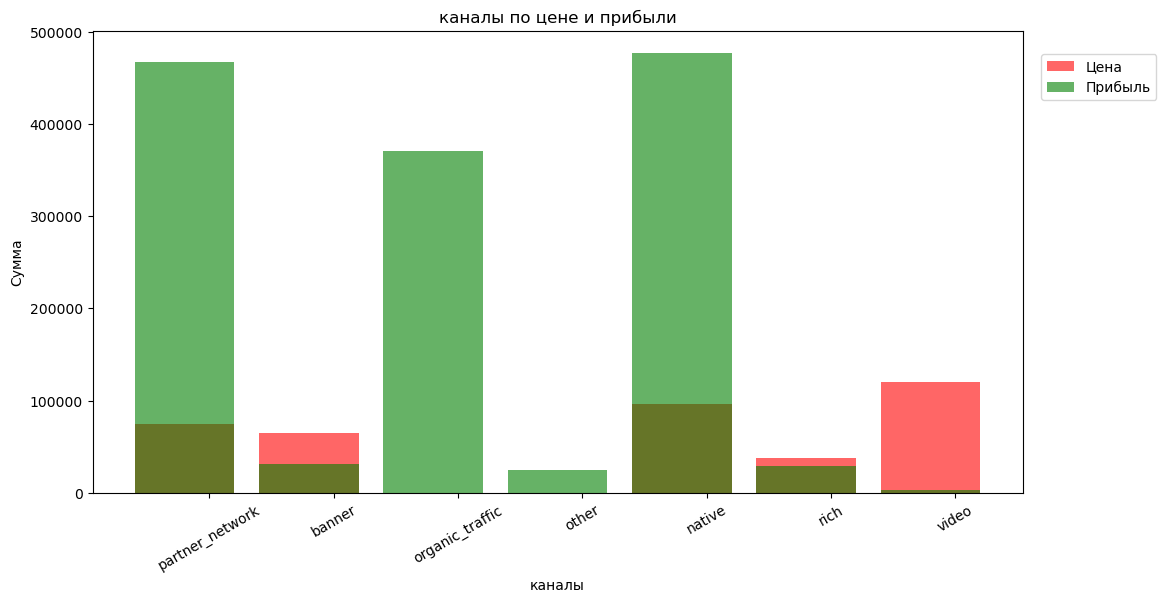

In [147]:
# Данные в переменные
utms = purchase_data.ad_channel.unique()
price = data.groupby('ad_channel')['price'].sum()
profit  = purchase_data.groupby('ad_channel')['profit'].sum()

# Настройка параметров графика
bar_width = 0.2
index = np.arange(len(utms))

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))

# Нарисовать столбцы
ax.bar(index, price, 
                color='red', alpha=0.6,
                label='Цена')
ax.bar(index, profit, 
                color='green', alpha=0.6,
                label='Прибыль')


# Настройка осей и заголовка
ax.set_xlabel('каналы')
ax.set_ylabel('Сумма')
ax.set_title('каналы по цене и прибыли')
# Указываем место для подписей
ax.set_xticks(index + bar_width)
# Указываем название подписей
ax.set_xticklabels(utms)
# Поворачиваем подпись на осях
ax.tick_params(axis='x', labelrotation=30)
# Легенда
ax.legend(loc=(1.02, 0.85))
# Отображение графика
plt.show()

In [125]:
grouped_data = data.groupby(['ad_channel', 'os']).size().unstack()

In [126]:
grouped_data

os,Android,iOS
ad_channel,,
banner,103733,45070
native,9911,22679
organic_traffic,85958,56905
other,3247,2096
partner_network,48401,48092
rich,3085,11857
video,111267,48588


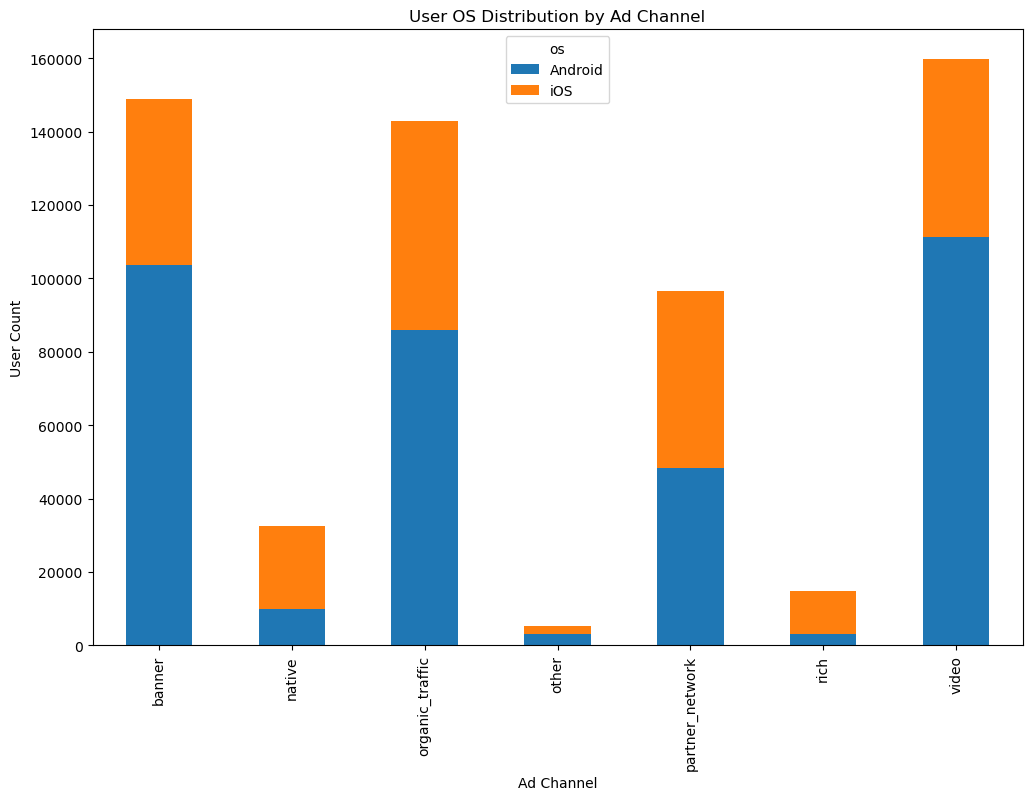

In [124]:
grouped_data = data.groupby(['ad_channel', 'os']).size().unstack()

# Построение графика
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('User OS Distribution by Ad Channel')
plt.xlabel('Ad Channel')
plt.ylabel('User Count')
plt.show()